In [2]:
import torch

In [3]:
t0 = torch.tensor(1000)
t1 = torch.tensor([9,8,6,5]) 
t2 = torch.tensor([[1,2,3],[7,5,3]])
print(t2)

tensor([[1, 2, 3],
        [7, 5, 3]])


In [4]:
a = torch.ones((2,3), dtype = torch.int16)
print(a)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [5]:
a.shape

torch.Size([2, 3])

In [6]:
# number of dimensions
a.ndim

2

In [7]:
# change the dimension of the tensor 
a.view(1,6)

tensor([[1, 1, 1, 1, 1, 1]], dtype=torch.int16)

# basic operations

In [8]:
u = torch.tensor([1.0, 2.0]) 
v = torch.tensor([3.0, 4.0]) 

u+v

tensor([4., 6.])

In [10]:
torch.rand(2,4)

tensor([[0.9237, 0.9060, 0.9258, 0.6086],
        [0.9082, 0.4293, 0.2659, 0.2653]])

In [11]:
a = torch.rand(2,4) *2 -1
a

tensor([[ 0.1233,  0.7881,  0.1299,  0.4529],
        [ 0.2722,  0.4946, -0.9476,  0.4599]])

In [12]:
torch.abs(a)

tensor([[0.1233, 0.7881, 0.1299, 0.4529],
        [0.2722, 0.4946, 0.9476, 0.4599]])

In [13]:
torch.ceil(a)

tensor([[1., 1., 1., 1.],
        [1., 1., -0., 1.]])

In [14]:
torch.clamp(a, -0.5, 0.5)

tensor([[ 0.1233,  0.5000,  0.1299,  0.4529],
        [ 0.2722,  0.4946, -0.5000,  0.4599]])

In [16]:
a.mean()

tensor(0.2217)

In [17]:
a.max()

tensor(0.7881)

## trigonometric functions and their inverses 

In [18]:
import numpy as np

In [19]:
x = torch.tensor([0, np.pi/2, np.pi])
torch.sin(x)

tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])

In [20]:
# an evenly spaced list of numbers between a range: 
pi = torch.linspace(-np.pi/2, np.pi/2, steps = 1000) 
sined = torch.sin(pi) 
print(sined[0:5])

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -0.9999])


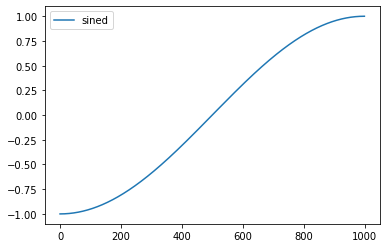

In [21]:
import matplotlib.pyplot as plt 

plt.plot(sined, label = 'sined') 
plt.legend()
plt.show()

# understand pytorch numpy bridge

In [23]:
u = torch.tensor([2,4]) 
v = torch.tensor([1,4]) 
print(u)

tensor([2, 4])


In [24]:
w = u*v
w

tensor([ 2, 16])

In [25]:
w.shape

torch.Size([2])

In [26]:
w.ndim

1

Broadcasting: i.e., if you have one array of size 10, the other of size 5, and you add them together, you'll get an array of size 10. the smaller array is used iteratively twice

In [27]:
a = torch.ones(4,3,2)
b = a*torch.rand(3,2) 
b

tensor([[[0.5460, 0.7837],
         [0.5861, 0.0664],
         [0.0031, 0.9178]],

        [[0.5460, 0.7837],
         [0.5861, 0.0664],
         [0.0031, 0.9178]],

        [[0.5460, 0.7837],
         [0.5861, 0.0664],
         [0.0031, 0.9178]],

        [[0.5460, 0.7837],
         [0.5861, 0.0664],
         [0.0031, 0.9178]]])

In [28]:
a*torch.rand(3,1)

tensor([[[0.1135, 0.1135],
         [0.5059, 0.5059],
         [0.2494, 0.2494]],

        [[0.1135, 0.1135],
         [0.5059, 0.5059],
         [0.2494, 0.2494]],

        [[0.1135, 0.1135],
         [0.5059, 0.5059],
         [0.2494, 0.2494]],

        [[0.1135, 0.1135],
         [0.5059, 0.5059],
         [0.2494, 0.2494]]])

In [29]:
a*torch.rand(1,2)

tensor([[[0.0801, 0.8445],
         [0.0801, 0.8445],
         [0.0801, 0.8445]],

        [[0.0801, 0.8445],
         [0.0801, 0.8445],
         [0.0801, 0.8445]],

        [[0.0801, 0.8445],
         [0.0801, 0.8445],
         [0.0801, 0.8445]],

        [[0.0801, 0.8445],
         [0.0801, 0.8445],
         [0.0801, 0.8445]]])

## switching between ndarrays and pytorch tensors

In [30]:
import numpy as np

In [32]:
ar = np.ones((2,3))
ten = torch.from_numpy(ar)
print(ar) 
print(ten)

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [33]:
ten.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]])

NOTE: they use the same underlying memory 

In [34]:
ar[1,1] = 23
print(ten)

tensor([[ 1.,  1.,  1.],
        [ 1., 23.,  1.]], dtype=torch.float64)


# autograd

In [35]:
import torch 
from torch.autograd import Variable

In [36]:
x = Variable(torch.ones(2,2), requires_grad = True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


This is created as a result of an operation, so it has a grad function 

In [38]:
y = x + 2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [40]:
print(y.grad_fn)

In [41]:
z = y*y*3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [42]:
# calculate the gradient 
out.backward()

In [43]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

## "advanced"

In [44]:
x = torch.randn(3) 
x = Variable(x, requires_grad = True) 
x

tensor([ 0.1341, -0.0999, -1.0093], requires_grad=True)

In [47]:
y = x*2 
while y.data.norm() <1000: 
    y = y*2 
print(y)

tensor([  137.2855,  -102.2957, -1033.5099], grad_fn=<MulBackward0>)


In [50]:
print(y.data)
print(y.data.norm())

tensor([  137.2855,  -102.2957, -1033.5099])
tensor(1047.5946)


In [51]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

In [52]:
x.grad

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])

In [53]:
from torch import nn, optim
import torchvision 

In [54]:
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

In [55]:
model = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/yijieyin/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [56]:
# freeze all parameters 
for param in model.parameters(): 
    param.requires_grad = False

In [58]:
model.fc = nn.Linear(512, 10)

In [59]:
optimiser = optim.SGD(model.parameters(), lr = 1e-2, momentum=0.9)

In [60]:
print(optimiser)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


# torchvision

In [1]:
%matplotlib inline

In [3]:
from pathlib import Path 
import matplotlib.pyplot as plt 
import numpy as np 

import torch 
import torchvision.transforms as T 
from torchvision.io import read_image 

plt.rcParams['savefig.bbox'] = 'tight' 
torch.manual_seed(1) 

def show(imgs): 
    fix, axs = plt.subplots(ncols = len(imgs), squeeze = False) 
    for i, img in enumerate(imgs): 
        img = T.ToPILImage()(img.to('cpu'))
        axs[0,i].imshow(np.asarray(img)) 
        axs[0,i].set(xticklables-[], yticklabels = [], xticks = [], yticks = []) 

In [4]:
str(Path('images') / 'pottery1.jpeg')

'images/pottery1.jpeg'

In [61]:
# define the adjacency matrix
adj_matrix = torch.tensor([[0, 1, 1], [1, 0, 1], [1, 1, 0]], dtype=torch.float)

# define the input tensor and set requires_grad=True to enable gradient computation
x = torch.tensor([1.0, 1.0, 1.0], requires_grad=True)

# define the target neuron index
target_neuron = 2

# define the ReLU activation function
relu = torch.nn.ReLU()

# compute the output of the network
h1 = relu(torch.matmul(adj_matrix, x))
output = relu(torch.matmul(adj_matrix, h1))[target_neuron]

# define the loss function as the negative activation of the target neuron
loss = -output

# perform backpropagation to compute the gradient of the loss with respect to the input
loss.backward()

# update the input based on the gradient
learning_rate = 0.1
with torch.no_grad():
    x -= learning_rate * x.grad

# reset the gradient to zero for the next iteration
x.grad.zero_()


tensor([0., 0., 0.])

In [72]:
torch.rand(3)

tensor([0.5919, 0.9295, 0.5861])

In [73]:
# define the adjacency matrix
adj_matrix = torch.tensor([[0, 1, 1], [1, 0, 1], [1, 1, 0]], dtype=torch.float)

# Define the learning rate and number of iterations for gradient ascent
learning_rate = 0.1
num_iterations = 100

# Create a random input image to modify
x = torch.rand(3)

# Define the optimizer as gradient ascent on the input image
optimizer = torch.optim.Adam([x], lr=learning_rate)

# define the target neuron index
target_neuron = 2

# define the ReLU activation function
relu = torch.nn.ReLU()

# Run the optimization loop for the specified number of iterations
for i in range(num_iterations):
    # Compute the loss and gradients
    
    # compute the output of the network
    h1 = relu(torch.matmul(adj_matrix, x))
    output = relu(torch.matmul(adj_matrix, h1))[target_neuron]

    # define the loss function as the negative activation of the target neuron
    loss = -output
    loss.backward()
    
    # Update the input image using gradient ascent
    optimizer.step()
    
    # Zero out the gradients for the next iteration
    optimizer.zero_grad()
    
    # Clip the input image values to the range [0, 1]
    x.clamp_(0, 1)

    # reset the gradient to zero for the next iteration
    x.grad.zero_()
    print(x)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [62]:
import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np
from PIL import Image

# Load a pre-trained model
model = models.vgg16(pretrained=True)

# Define the layer and neuron to maximize activation
target_layer = model.features[12]
target_neuron = 0

# Define the learning rate and number of iterations for gradient ascent
learning_rate = 0.1
num_iterations = 100

# Create a random input image to modify
input_image = torch.rand(1, 3, 224, 224)

# Define the loss function as the negative activation of the target neuron
class ActivationLoss(nn.Module):
    def __init__(self, target_layer, target_neuron):
        super().__init__()
        self.target_layer = target_layer
        self.target_neuron = target_neuron
    
    def forward(self, x):
        activation = self.target_layer(x)[0][self.target_neuron]
        return -activation

# Create an instance of the loss function
loss_function = ActivationLoss(target_layer, target_neuron)

# Define the optimizer as gradient ascent on the input image
optimizer = torch.optim.Adam([input_image], lr=learning_rate)

# Run the optimization loop for the specified number of iterations
for i in range(num_iterations):
    # Compute the loss and gradients
    loss = loss_function(input_image)
    loss.backward()
    
    # Update the input image using gradient ascent
    optimizer.step()
    
    # Zero out the gradients for the next iteration
    optimizer.zero_grad()
    
    # Clip the input image values to the range [0, 1]
    input_image.clamp_(0, 1)

# Convert the optimized input image to a numpy array and visualize it
optimized_image = np.transpose(input_image.detach().numpy()[0], (1, 2, 0))
Image.fromarray((optimized_image * 255).astype(np.uint8)).show()


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/yijieyin/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

RuntimeError: Given groups=1, weight of size [256, 256, 3, 3], expected input[1, 3, 224, 224] to have 256 channels, but got 3 channels instead

In [63]:
import torch
from torchvision import models, transforms

# Load the pretrained network
model = models.vgg16(pretrained=True)
model.eval()

# Select the target layer and neuron
target_layer = model.features[28]
target_neuron = 10

# Define the loss function
loss_function = torch.nn.MSELoss()

# Load and preprocess the input image
image_path = '/Users/yijieyin/Downloads/things_db8b96ba-bc21-4ce2-a0ae-136727773c21/aardvark/aardvark_02s.jpg'
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
image = transform(Image.open(image_path)).unsqueeze(0)

# Initialize the input image to be optimized
input_image = torch.randn_like(image, requires_grad=True)

# Set the optimizer
optimizer = torch.optim.Adam([input_image], lr=0.1)

# Run the optimization loop
num_iterations = 1000
for i in range(num_iterations):
    # Preprocess the input image to match the expected size and shape of the pretrained network
    input_image_preprocessed = torch.nn.functional.interpolate(input_image, size=224, mode='bilinear', align_corners=False)
    
    # Compute the loss and gradients
    activation = target_layer(input_image_preprocessed)[0][target_neuron]
    loss = loss_function(activation, torch.tensor(1.0))
    loss.backward()
    
    # Update the input image
    optimizer.step()
    input_image.data.clamp_(0, 1)
    optimizer.zero_grad()

# Save the optimized image
output_image = transforms.functional.to_pil_image(input_image[0])
output_image.save('/Users/yijieyin/Downloads/out_image.jpg')


RuntimeError: Given groups=1, weight of size [512, 512, 3, 3], expected input[1, 3, 224, 224] to have 512 channels, but got 3 channels instead

In [65]:
input_image_preprocessed.shape

torch.Size([1, 3, 224, 224])

In [67]:
input_image.shape

torch.Size([1, 3, 224, 224])